In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import statistics
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Data understanding


In [88]:
set1_df = pd.read_csv(r'../data/set9_it1CLEANED.csv')
set2_df = pd.read_csv(r'../data/set9_it2.csv')

In [89]:
# Checking for missing values
print(set2_df.isna().sum())

DI                     0
StructuralIntegrity    0
ExteriorCharm          0
dtype: int64


Visually checking data of string fields to detect typos or duplication

In [90]:
print(set2_df[['ExteriorCharm']].squeeze().unique())

['Common' 'Gleaming' 'Enchanting' 'Modest']


Finding min and max values for numeric rows

In [91]:
minTraveValue = str(set1_df['TradeValue'].min())
maxTradeValue = str(set1_df['TradeValue'].max())

minLivingQuarters = str(set1_df['LivingQuarters'].min())
maxLivingQuarters = str(set1_df['LivingQuarters'].max())

minParcelSize = str(set1_df['ParcelSize'].min())
maxParcelSize = str(set1_df['ParcelSize'].max())

minStructuralIntegrity = str(set2_df['StructuralIntegrity'].min())
maxStructuralIntegrity = str(set2_df['StructuralIntegrity'].max())

print(f"""
Trade Value: {minTraveValue} - {maxTradeValue}
Living Quarters: {minLivingQuarters} - {maxLivingQuarters}
Parcel Size: {minParcelSize} - {maxParcelSize}
Structural Integrity: {minStructuralIntegrity} - {maxStructuralIntegrity}
""")



Trade Value: 12789.0 - 755000.0
Living Quarters: 256.0 - 4339.0
Parcel Size: 136.56741 - 15297.40798
Structural Integrity: 1 - 9



In [92]:
meanTradeValue = set1_df["TradeValue"].mean()
medianTradeValue = set1_df["TradeValue"].median()
modeTradeValue = set1_df["TradeValue"].mode().squeeze()

meanLivingQuarters = set1_df["LivingQuarters"].mean()
medianLivingQuarters = set1_df["LivingQuarters"].median()
modeLivingQuarters = set1_df["LivingQuarters"].mode().squeeze()

meanParcelSize = set1_df["ParcelSize"].mean()
medianParcelSize = set1_df["ParcelSize"].median()
modeParcelSize = set1_df["ParcelSize"].mode().squeeze()

modeRealmType = set1_df["RealmType"].mode().squeeze()
modeEnclave = set1_df["Enclave"].mode().squeeze()

meanStructuralIntegrity = set2_df["StructuralIntegrity"].mean()
medianStructuralIntegrity = set2_df["StructuralIntegrity"].median()
modeStructuralIntegrity = set2_df["StructuralIntegrity"].mode().squeeze()

modeExteriorCharm = set2_df["ExteriorCharm"].mode().squeeze()

print(f"""
Mean Values:
Trade Value: {meanTradeValue}
Living Quarters: {meanLivingQuarters}
Parcel Size: {meanParcelSize}
Structural Integrity: {meanStructuralIntegrity}

Median Values:
Trade Value: {medianTradeValue}
Living Quarters: {medianLivingQuarters}
Parcel Size: {medianParcelSize}
Structural Integrity: {medianStructuralIntegrity}

Mode for Numerics:
Trade Value: {modeTradeValue}
Living Quarters: {modeLivingQuarters}
Parcel Size: {modeParcelSize}
Structural Integrity: {modeStructuralIntegrity}

Mode for Strings:
Realm Type: {modeRealmType}
Enclave: {modeEnclave}
Exterior Charm: {modeExteriorCharm}
""")


Mean Values:
Trade Value: 181912.29809437387
Living Quarters: 1154.9668784029038
Parcel Size: 936.2141333493647
Structural Integrity: 5.561574269995768

Median Values:
Trade Value: 160500.0
Living Quarters: 1111.5
Parcel Size: 870.965625
Structural Integrity: 5.0

Mode for Numerics:
Trade Value: 135000.0
Living Quarters: 664.0
Parcel Size: 891.8688
Structural Integrity: 5

Mode for Strings:
Realm Type: Meadowlands
Enclave: Dragonspire
Exterior Charm: Common



# Data Preperation


In [93]:
set2_df.drop_duplicates(inplace=True)

## Merging


In [94]:
# Merging cleaned datasets on DI collumn
df = set1_df.merge(set2_df, left_on='DI', right_on='DI')

In [95]:
# Check if the merge was succesfull 
print("set1 shape:", set1_df.shape)
print("set2 shape:", set2_df.shape)
print("merged shape:", df.shape)

set1 shape: (2204, 7)
set2 shape: (2340, 3)
merged shape: (2204, 9)


## Deriving Affortibility 

In [ ]:
# Calculate the Affortibility for test_set
INCOME = 30000

INTEREST_RATE_PER_MONTH = 0.04 / 12

LOAN_TERM = 30

LOAN_TERM_YEARS = 30 

LOAN_TERM_MONTHS = LOAN_TERM_YEARS * 12

DOWNPAYMENT_MODIFIER = 0.2

AFFORDABILITY_THRESHOLD = (INCOME / 12) * 0.3  # 30% of monthly income


def is_affordable(trade_value):
    if np.isnan(trade_value) or trade_value <= 0:
        return 0  

    loan_amount = trade_value * (1 - DOWNPAYMENT_MODIFIER)

    # Compute monthly mortgage payment
    monthly_payment = loan_amount * (INTEREST_RATE_PER_MONTH * (1 + INTEREST_RATE_PER_MONTH) ** LOAN_TERM_MONTHS) / \
                      ((1 + INTEREST_RATE_PER_MONTH) ** LOAN_TERM_MONTHS - 1)


    return 1 if monthly_payment <= AFFORDABILITY_THRESHOLD else 0

# Apply function to dataset
df["AffortableDwelling"] = df["TradeValue"].apply(is_affordable)

## Data Correlation

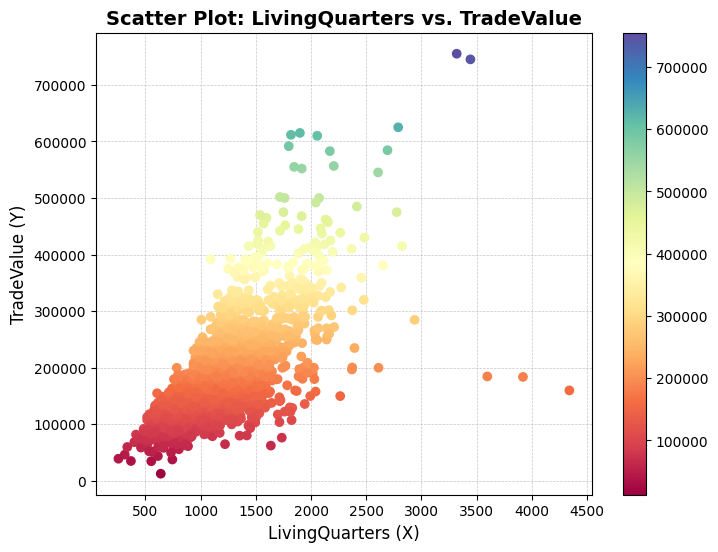

In [96]:
rcParams['figure.figsize'] = 8,6

plt.scatter(
    df["LivingQuarters"], 
    df["TradeValue"], 
    c=df["TradeValue"],
    cmap='Spectral',   
    zorder=3 
)
plt.xlabel("LivingQuarters (X)", fontsize=12)
plt.ylabel("TradeValue (Y)", fontsize=12)
plt.title("Scatter Plot: LivingQuarters vs. TradeValue", fontsize=14, fontweight='bold')
plt.colorbar()
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

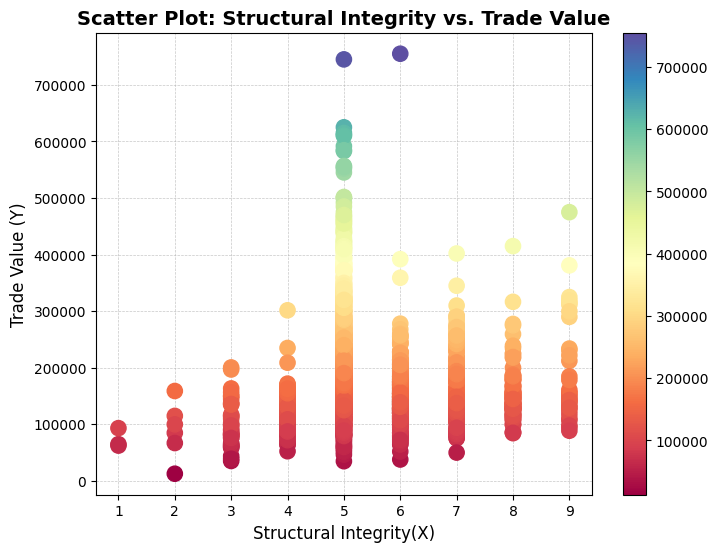

In [97]:
rcParams['figure.figsize'] = 8, 6

# Styling
plt.scatter(
    df["StructuralIntegrity"], 
    df["TradeValue"], 
    c=df["TradeValue"],
    cmap='Spectral',       
    s=120,
    zorder=3 
)

plt.xlabel("Structural Integrity(X)", fontsize=12)
plt.ylabel("Trade Value (Y)", fontsize=12)
plt.title("Scatter Plot: Structural Integrity vs. Trade Value", fontsize=14, fontweight='bold')
plt.colorbar()

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

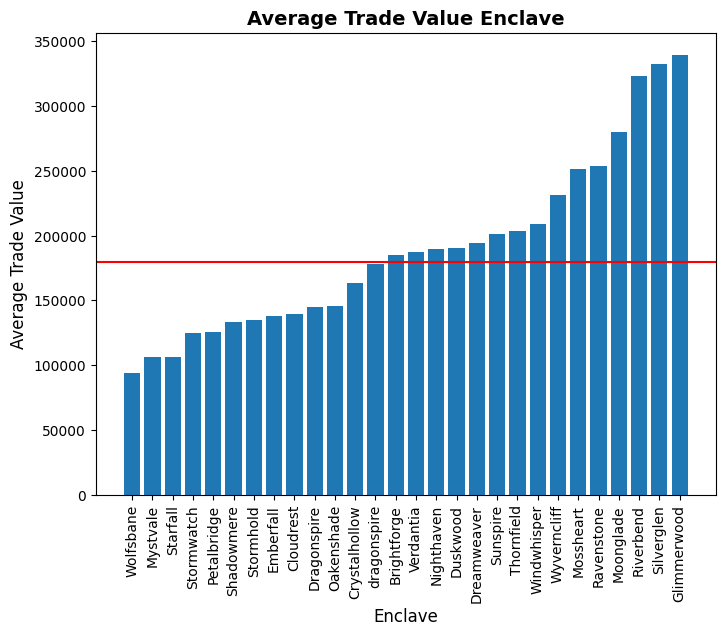

In [98]:
# Compute the average TradeValue per Enclave
avgTradeValuePerEnclave = df.groupby('Enclave')['TradeValue'].mean().sort_values()
filtered_avgEnclave = avgTradeValuePerEnclave[avgTradeValuePerEnclave > 180000]

# Plot the bar chart
plt.bar(avgTradeValuePerEnclave.index, avgTradeValuePerEnclave.values)



# Labels and title
plt.xlabel("Enclave", fontsize=12)
plt.ylabel("Average Trade Value", fontsize=12)
plt.axhline(180000, color='red', alpha=1)
plt.title("Average Trade Value Enclave", fontsize=14, fontweight='bold')
plt.xticks(rotation='vertical')
plt.show()


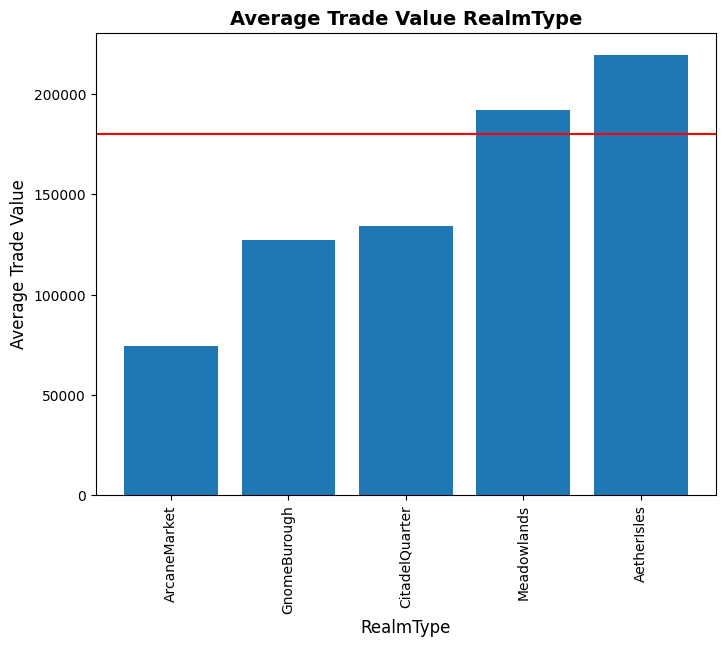

In [99]:
# Compute the average TradeValue per RealmType
avgTradeValuePerRealmType = df.groupby('RealmType')['TradeValue'].mean().sort_values()
filtered_avgRealmType = avgTradeValuePerRealmType[avgTradeValuePerRealmType > 180000]

# Plot the bar chart
plt.bar(avgTradeValuePerRealmType.index, avgTradeValuePerRealmType.values)



# Labels and title
plt.xlabel("RealmType", fontsize=12)
plt.ylabel("Average Trade Value", fontsize=12)
plt.axhline(180000, color='red', alpha=1)
plt.title("Average Trade Value RealmType", fontsize=14, fontweight='bold')
plt.xticks(rotation='vertical')
plt.show()


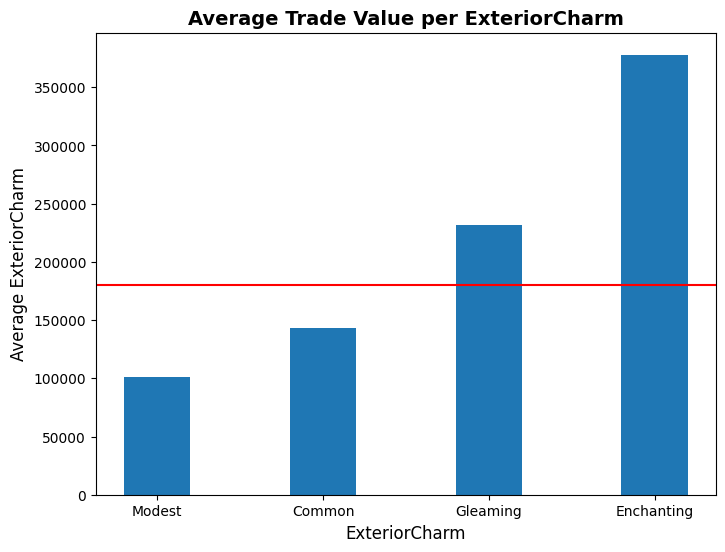

In [100]:
# Compute the average TradeValue per ExteriorCharm
avgTradeValuePerCharm = df.groupby('ExteriorCharm')['TradeValue'].mean().sort_values()

# Plot the bar chart
plt.bar(avgTradeValuePerCharm.index, avgTradeValuePerCharm.values,width=0.4)

# Labels and title
plt.xlabel("ExteriorCharm", fontsize=12)
plt.ylabel("Average ExteriorCharm", fontsize=12)

plt.axhline(180000, color='red', alpha=1)
plt.title("Average Trade Value per ExteriorCharm", fontsize=14, fontweight='bold')
plt.show()


## Modeling

In [ ]:

# Splitting into test and train sets as per feedback
# I don't understand the need for this, since the model isn't actually training on anything
# cause it's simple if statements what's the point of the split ?
X_train, X_test,y_train, y_test = train_test_split(df.filter(items=[col for col in df.columns if col != 'AffortableDwelling']),df['AffortableDwelling'], test_size=0.2, random_state=42)

# We focus on the area where we visually noted that the mean trade value is below 180 000 (this number comes from reversing above mathematics and is an approximation of the result)
# So the following rules work based on exclusion of the most pricy Enclaves, Realtypes the most Charming houses
# We mostly focus on nominal data here since it's the easiest to correlated visually 
def is_affortable_model(row):
    # Excluding the ExteriorCharms with mean tradeValue above 180 000
    if(row['ExteriorCharm']  not in ['Gleaming','Enchanting']):
        return 1
    # Excluding the Enclaves with mean tradeValue above 180 000
    if(row['Enclave'] not in filtered_avgEnclave.index):
        return 1
    # Excluding the RealTypes with mean tradeValue above 180 000
    if(row['RealmType'] not in ["AetherIsles", "Meadowlands"]):
        return 1
    return 0
    


X_train["AffortableDwelling"] = X_train.apply(is_affortable_model,axis=1)

X_test["AffortableDwelling"] = X_test.apply(is_affortable_model,axis=1)


# Actual values from df
y_pred = X_test['AffortableDwelling']

# Predicted values from test_set
y_true = y_test


## Evaluation

In [102]:
# Confusion matrix based on the test results
cm = confusion_matrix(y_true, y_pred)
TN, FP, FN, TP = cm.ravel()
total = len(X_test)

# Compute metrics
error_rate = (FP + FN) / total
accuracy = (TP + TN) / total
true_positive_rate = TP / (TP + FN) if (TP + FN) > 0 else 0  # Avoid division by zero
true_negative_rate = TN / (TN + FP) if (TN + FP) > 0 else 0
positive_predictive_value = TP / (TP + FP) if (TP + FP) > 0 else 0

# Print results
print(f"Confusion Matrix:\n{cm}")
print(f"Total Instances: {total}")
print(f"------------------------")
print(f"True Possitives: {TP}")
print(f"True Negatives: {TN}")
print(f"False Possitives: {FP}")
print(f"False Negatives: {FN}")
print(f"------------------------")
print(f"Error Rate (Misclassification Rate): {error_rate:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"True Positive Rate (TPR / Recall): {true_positive_rate:.4f}")
print(f"True Negative Rate (TNR / Specificity): {true_negative_rate:.4f}")
print(f"Positive Predictive Value (PPV / Precision): {positive_predictive_value:.4f}")

Confusion Matrix:
[[110  29]
 [ 40 262]]
Total Instances: 441
------------------------
True Possitives: 262
True Negatives: 110
False Possitives: 29
False Negatives: 40
------------------------
Error Rate (Misclassification Rate): 0.1565
Accuracy: 0.8435
True Positive Rate (TPR / Recall): 0.8675
True Negative Rate (TNR / Specificity): 0.7914
Positive Predictive Value (PPV / Precision): 0.9003


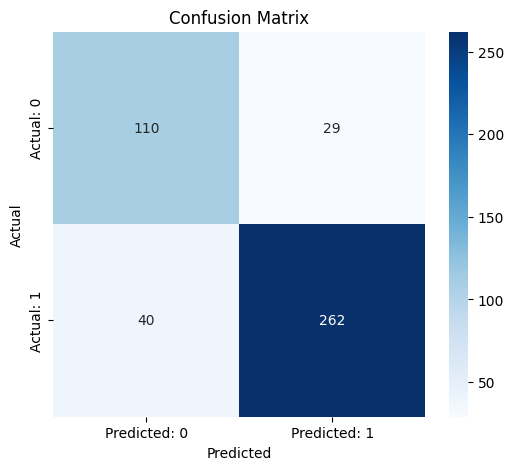

In [103]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Predicted: 0', 'Predicted: 1'], 
            yticklabels=['Actual: 0', 'Actual: 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [ ]:
# Export the cleaned data for next iteration
df.to_csv('set9_it2CLEANED.csv', index=False)